<a href="https://colab.research.google.com/github/ridho237/image-processing/blob/main/Pengolahan_Citra_M12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importing Python Packages

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 2. Membaca gambar


In [4]:
image_path = "/content/burnice.jpeg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#3. Menampilkan gambar asli

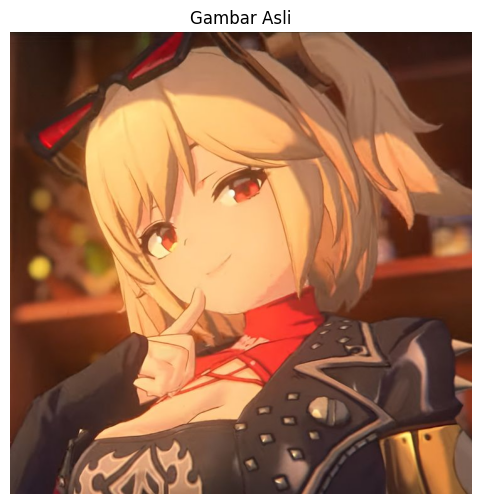

In [5]:
plt.figure(figsize=(6, 6))
plt.title("Gambar Asli")
plt.imshow(image)
plt.axis("off")
plt.show()

#4. Konversi gambar menjadi data 2D

In [6]:
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# 5. Parameter K-Means

In [7]:
k = 3  # Jumlah cluster
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# 6. Mengubah pusat cluster menjadi nilai integer

In [8]:
centers = np.uint8(centers)

# 7. Membuat gambar tersegmentasi

In [9]:
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# 8. Menampilkan hasil segmentasi

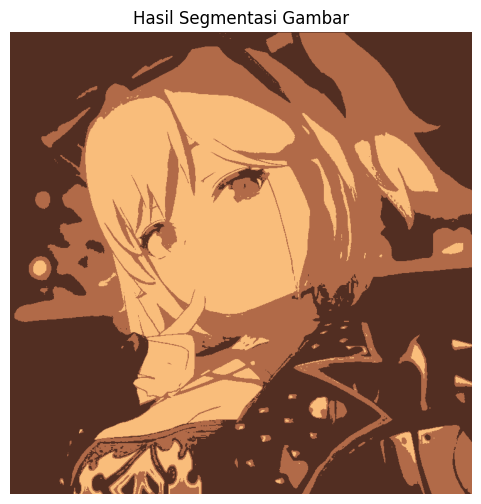

In [10]:
plt.figure(figsize=(6, 6))
plt.title("Hasil Segmentasi Gambar")
plt.imshow(segmented_image)
plt.axis("off")
plt.show()

# 9. Menampilkan masing-masing cluster

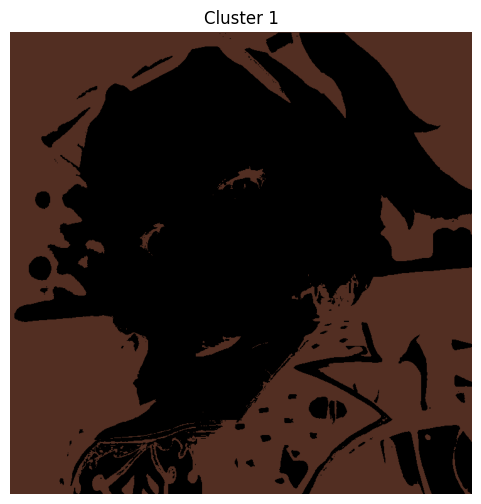

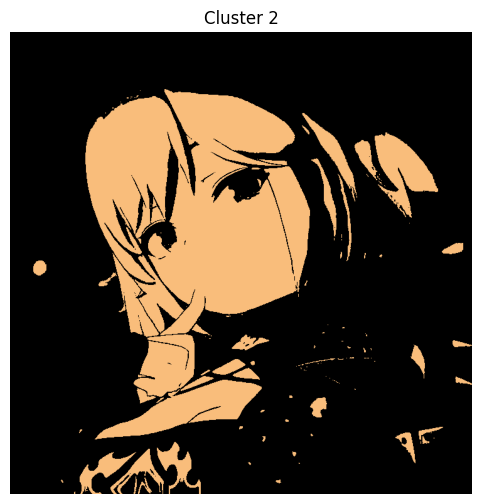

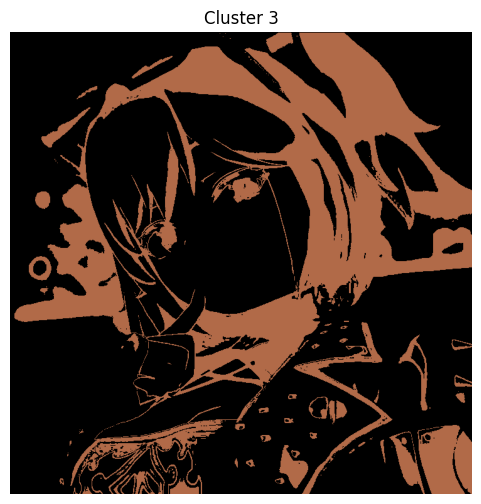

In [11]:
for i in range(k):
    cluster = (labels.flatten() == i).reshape(image.shape[:2])
    cluster_image = np.zeros_like(image)
    cluster_image[cluster] = centers[i]

    plt.figure(figsize=(6, 6))
    plt.title(f"Cluster {i + 1}")
    plt.imshow(cluster_image)
    plt.axis("off")
    plt.show()